In [1]:
import numpy as np # linear algebra 
import pandas as pd # data processing

import seaborn as sns 
import matplotlib as plt 
import sklearn 

In [2]:
# import Data
pccpdf_new=pd.read_csv("C:/Users/chunweil/under_sample_PCCP.csv")
# Drop unrelavent columns
pccpdf_new=pccpdf_new.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
# correlation between features
corr=pccpdf_new.corr()
pd.DataFrame(corr)
correlation_break = pd.DataFrame(corr["NEW"])
correlation_break.sort_values(by = 'NEW', ascending = False)

,NEW
NEW,1.000000
EM,0.879721
TotalWB,0.845742
AFO,0.575368
Predicted,0.121749
Diameter,0.062418
FEA_WBYield,0.051487
Manufacturer_International Pipe & Ceramics Corporation,0.042813
WireClass_II,0.035900
Manufacturer_Interpace-Lock Joint Pipe Co.,0.016219


In [3]:
# Check descriptive statistics
print pccpdf_new["NEW"].describe()


count    12384.000000
mean         0.380810
std          0.766572
min          0.000000
25%          0.000000
50%          0.000000
75%          0.144844
max          4.394449
Name: NEW, dtype: float64


In [4]:
# distribution of new variable
import seaborn as sns 
import matplotlib as plt 
sns.distplot(pccpdf_new["NEW"])


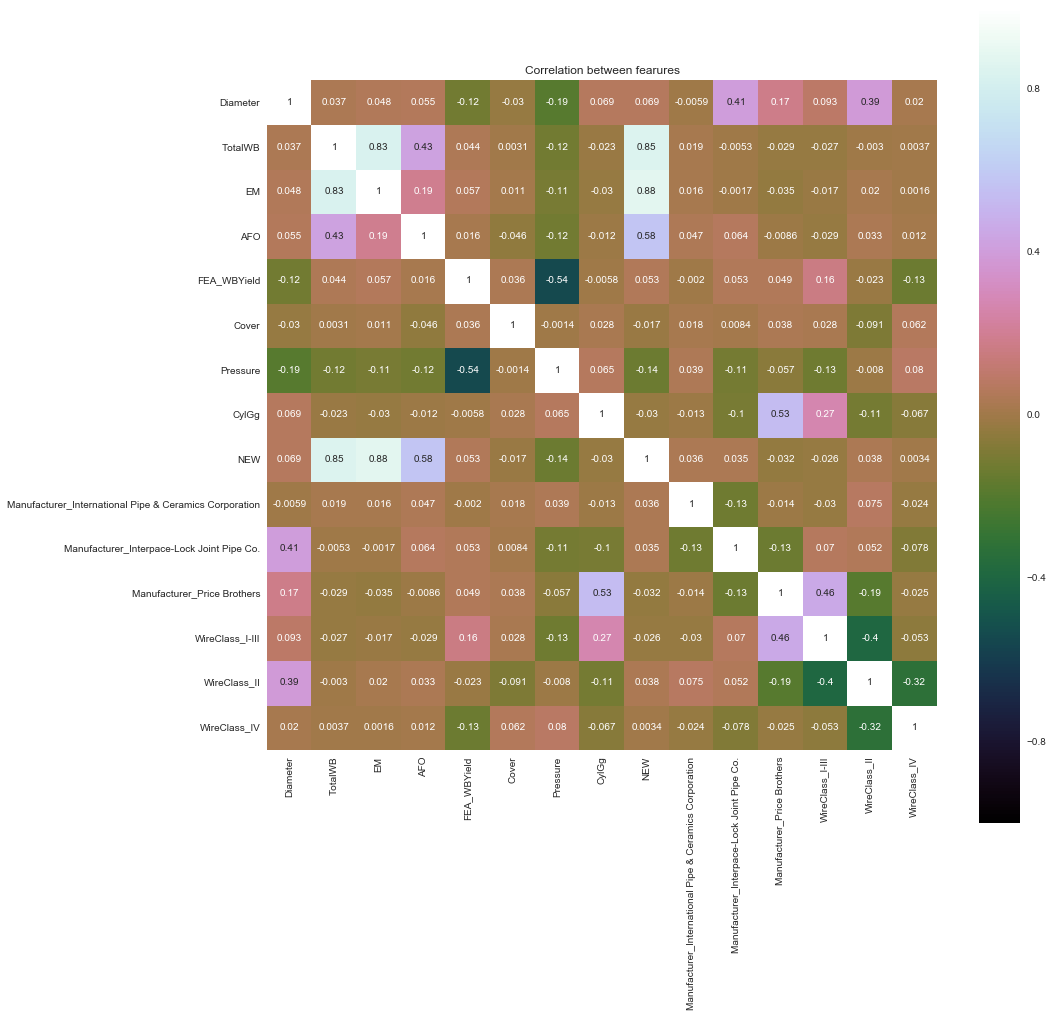

In [78]:
# Correlation matrix plot 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
correlation=pccpdf_new.corr()
# By changing the figsize argument we can adjust the size of figure
plot= plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
# Specify the title of the figure
plt.title('Correlation between fearures')
# Save the figure
plot.savefig('Correlation Matrix')

In [5]:
# splitting to training data and test data 
from sklearn.model_selection import train_test_split
# Select 80% of data as train set and 20% of data as test
train,test = train_test_split(pccpdf_new,test_size=0.20,random_state=7)

# Split into training and cv for cross-validation
# Specify the predictors and target 
predictors=train.columns.drop(['NEW',"TotalWB","EM","AFO"])
print(predictors)
X=train.loc[:,predictors]
x_train,x_cv,y_train,y_cv=train_test_split(X,train.NEW)

Index([u'Diameter', u'FEA_WBYield', u'Cover', u'Pressure', u'CylGg',
       u'Manufacturer_International Pipe & Ceramics Corporation',
       u'Manufacturer_Interpace-Lock Joint Pipe Co.',
       u'Manufacturer_Price Brothers', u'WireClass_I-III', u'WireClass_II',
       u'WireClass_IV', u'Predicted'],
      dtype='object')


In [8]:
# Create a function for checking mse and R2 of regression model
def regression_model(model):
    seed=np.random.seed(1)
    model.fit(x_train,y_train) # model fit
    pred=model.predict(x_cv)# predict
    mse=np.mean((pred-y_cv)**2) 
    r2=model.score(x_cv,y_cv)
    return mse,r2

In [9]:
# create a function for plotting coefficient 
def coefficient_plot(model):
    coeff=pd.Series(model.coef_,predictors).sort_values()
    return coeff.plot(kind="bar",title="Model Coefficients")

In [11]:
# Ridge Regression 
# alpha can be optimized
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
regression_model(ridgeReg)
# Lasso
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.0001, normalize=True)
regression_model(lassoReg)
coefficient_plot(lassoReg)
# Linear Regression
from sklearn.linear_model import LinearRegression
Ireg=LinearRegression()
print regression_model(Ireg)
print regression_model(ridgeReg)
print regression_model(lassoReg)

(0.5463983474845232, 0.057362310619813894)
(0.5469467345428408, 0.056416242038314635)
(0.5479844809774289, 0.05462593848822949)


In [12]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.0001, normalize=True)
regression_model(lassoReg)
coefficient_plot(lassoReg)

In [14]:
# Create a function for Machine Learning model with Parameter Tuning
# We can change the type of scoring in GridSearchCV (now we use R2)
from sklearn.model_selection import GridSearchCV
def Regression_model_GridSearch(model,params):
    clf = GridSearchCV(model,params,scoring= 'r2',cv=5)
    clf.fit(x_train_1,y_train_1)
    print("best score is :")
    print(clf.best_score_)
    print('')
    print("best estimator is :")
    print(clf.best_estimator_)

    return (clf.best_score_)

In [15]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 5],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              }
model_rfr=RandomForestRegressor()
grid_rfr=GridSearchCV(model_rfr,param_grid=param_grid)
grid_rfr.fit(x_train,y_train)
print (grid_rfr)
# summary of the results of the grid search
print(grid_rfr.best_score_)
print(grid_rfr.best_estimator_)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 3, 5], 'min_samples_split': [2, 3, 10], 'bootstrap': [True, False], 'max_depth': [3, None], 'min_samples_leaf': [1, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
0.161456453218
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jo

In [17]:
# RF with Tuning Parameter( attach the tuning parameter to here)
model_rfr_t=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

regression_model(model_rfr_t)

(0.4798386372031563, 0.17219005816753008)

In [19]:
# Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor
seed=np.random.seed(1)
model_gbr = GradientBoostingRegressor(random_state=seed,alpha = 0.9)
regression_model(model_gbr)

(0.48014777520894186, 0.171656738224646)

In [20]:
# Make comaparision across all models 
pccp_em_model=[Ireg,ridgeReg,lassoReg,model_gbr,model_rfr_t]
MSE_EM=[]
R2_EM=[]

for model in pccp_em_model:
    r2=regression_model(model)[1]
    R2_EM.append(r2)

for model in pccp_em_model:
    mse=regression_model(model)[0]
    MSE_EM.append(mse)
    
    print R2_EM

[0.057362310620586499, 0.056416242038314864, 0.05462593848822949, 0.171656738224646, 0.17219005816753008]
[0.057362310620586499, 0.056416242038314864, 0.05462593848822949, 0.171656738224646, 0.17219005816753008]
[0.057362310620586499, 0.056416242038314864, 0.05462593848822949, 0.171656738224646, 0.17219005816753008]
[0.057362310620586499, 0.056416242038314864, 0.05462593848822949, 0.171656738224646, 0.17219005816753008]
[0.057362310620586499, 0.056416242038314864, 0.05462593848822949, 0.171656738224646, 0.17219005816753008]


In [21]:
# Performance of machine learning models
labels=["Linear Re","Ridge","Lasso","Gradient Boosting","Random Forest with pt"]
# Build the dataframe for evaluation
DF=pd.DataFrame({"MSE":MSE_EM,"R2":R2_EM},index=labels)
DF.head(5)

,MSE,R2
Linear Re,0.546398,0.057362
Ridge,0.546947,0.056416
Lasso,0.547984,0.054626
Gradient Boosting,0.480148,0.171657
Random Forest with pt,0.479839,0.172190


In [22]:
# Specify the predictors and target in dataset
predictors=train.columns.drop(['NEW',"TotalWB","EM","AFO"])
pccp_final=pccpdf_new.loc[:,predictors]

In [23]:
# Predicted Values
def regression_model_prediction(model):
    model.fit(x_train,y_train) # model fit
    pred=model.predict(predictors_final)# predict
    #mse=np.mean((pred-y_cv_1)**2)
    #r2=model.score(x_cv_1,y_cv_1)
    return pred

In [24]:
a=model_rfr_t.predict(pccp_final)
DF=pd.DataFrame({"Predicted":a})
DF.head()

,Predicted
0,0.325409
1,0.137199
2,0.101440
3,0.539984
4,0.648467


In [25]:
sns.distplot(DF)

In [26]:
DF.describe()

,Predicted
count,12384.000000
mean,0.386934
std,0.368588
min,0.000000
25%,0.134947
50%,0.272542
75%,0.517770
max,2.445323
